# computer vision

# fashion MNIST

In [12]:
import tensorflow as tf

In [13]:
fmnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()

In [14]:
fmnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'e:\\Tensorflow_Exam\\te\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

LABEL: 2
\image pixel array:
 [[  0   0   0   0   0   0   0   0   5   0  87 148 131 164 156 156 139  38   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 172 142 104  93  95  95 139 145   0   2   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   2   0   0 164 175 142  98 123 126 137 150   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  38 175 150 150 161 172 156 148 134 134 115  21   0   0   0   0   0   0   0   0]
 [  0   0   0   0   2   0  10 139 139 142 145 156 175 178 150 137 142 137 134 134 112   8   0   2   0   0   0   0]
 [  0   0   0   0   2   0 120 137 120 112 104  98 115 145 134 115 109 104 115 115 128 106   0   0   0   0   0   0]
 [  0   0   0   0   0  13 156 128 115 126 123 117 106  98 106  98  87 126 112 117 115 134   0   0   0   0   0   0]
 [  0   0   0   0   0  71 148 161  98 123 120 120 117 120 126  76 254 244  74 112 126 134  49   0   0   0   0   0]
 [  0   0   0   0   0 128 123 180 134  95 112 115 

Exception ignored in: <_io.BufferedReader name='E:\\Tensorflow_Exam\\te\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'>
Traceback (most recent call last):
  File "e:\Tensorflow_Exam\te\lib\site-packages\matplotlib\backends\backend_agg.py", line 234, in get_text_width_height_descent
    font.set_text(s, 0.0, flags=get_hinting_flag())
PermissionError: [Errno 13] Permission denied
Exception ignored in: <_io.BufferedReader name='E:\\Tensorflow_Exam\\te\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'>
Traceback (most recent call last):
  File "e:\Tensorflow_Exam\te\lib\site-packages\matplotlib\backends\backend_agg.py", line 234, in get_text_width_height_descent
    font.set_text(s, 0.0, flags=get_hinting_flag())
PermissionError: [Errno 13] Permission denied
Exception ignored in: <_io.BufferedReader name='E:\\Tensorflow_Exam\\te\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'>
Traceback (most recent call last):
  File "e:\

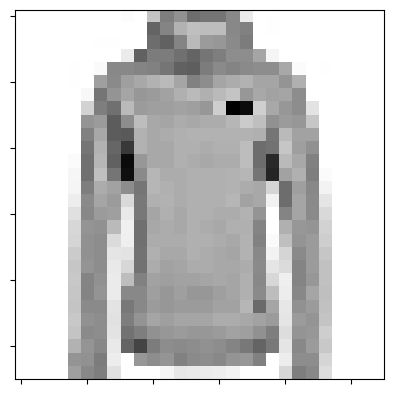

In [15]:
import numpy as np 
import matplotlib.pyplot as plt

# can put between 0 to 59999 here
index = 45000

# setting number of charecters per row when printing
np.set_printoptions(linewidth=320)

# print the label and image 
print(f'LABEL: {train_labels[index]}')
print(f'\image pixel array:\n {train_images[index]}')

# visualize the image 
plt.imshow(train_images[index],cmap='Greys')
      
      



All the values are between 0 to 255 . while working on your network, it is better to have values between 0 nad 1 . it is called normalization 

In [16]:
# normalizing pixel values of the train and test image 
train_images = train_images / 255.0
test_images = test_images / 255.0

<b> Now design the model </b>

In [17]:
model =  tf.keras.Sequential([tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(128,activation=tf.nn.relu),
                              tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values greater than 0 to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [19]:
# declare sample inputs and convert to a tensor 
inputs = np.array([[1.0,3.0,4.0,2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

#feed the inputes to a softmax actiavtion function 
outputs = tf.keras.activations.softmax(inputs)
print(f'input to softmax function: {outputs.numpy()}')

# get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of output: {sum}')

# get index with highest values
prediction = np.argmax(outputs)
print(f'class with highest probablity : {prediction}') 

input to softmax function: [[1. 3. 4. 2.]]
input to softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of output: 1.0
class with highest probablity : 2


In [27]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images,train_labels,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1174 - accuracy: 0.9550
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1136 - accuracy: 0.9570
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1129 - accuracy: 0.9570
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1090 - accuracy: 0.9585
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1089 - accuracy: 0.9591
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1053 - accuracy: 0.9605
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1031 - accuracy: 0.9613
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1026 - accuracy: 0.9613
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1018 - accuracy: 0.9620
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.098

In [28]:
# evaluting the model using unseen data 
model.evaluate(test_images,test_labels)

313/313 [==============================] - 0s 746us/step - loss: 0.5531 - accuracy: 0.8853


[0.5530906319618225, 0.8852999806404114]

In [29]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print("\nLoss is low so cancelling trainig")
            self.model.stop_training = True
    

In [35]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.4

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the loss
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()